# Clustering

In [58]:
!pip install gensim

## Data pre-processing

In [70]:
# Loading data
import ast
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# reading the main dataset 
df = pd.read_csv('../data/dataset.csv')

# NLTK tools
wnl = WordNetLemmatizer()
stopws = set(stopwords.words('english'))

# reducing to the unlabeled dataset
df = df[df['genres'].apply(lambda x: len(ast.literal_eval(x))) >= 1]
df['genres'] = df['genres'].map(lambda genres: ast.literal_eval(genres))
df['summary'] = df['summary'].map(lambda summary: [wnl.lemmatize(t).lower() 
                                                   for t in  word_tokenize(summary)
                                                   if wnl.lemmatize(t) not in stopws and t.isalpha()])
df.reset_index(inplace=True)
df = df.rename(columns={"Unnamed: 0": "oldindex"})
df = df.drop(columns=['index'])
df.head()

,oldindex,wiki_id,frbs_id,name,author,date,genres,summary
0,0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"[Roman à clef, Satire, Children's literature, ...","[old, major, old, boar, manor, farm, call, ani..."
1,1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"[Science Fiction, Novella, Speculative fiction...","[alex, teenager, living, england, lead, gang, ..."
2,2,986,/m/0ldx,The Plague,Albert Camus,1947,"[Existentialism, Fiction, Absurdist fiction, N...","[the, text, the, plague, divided, five, part, ..."
3,4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"[Hard science fiction, Science Fiction, Specul...","[the, novel, posit, space, around, milky, way,..."
4,5,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"[War novel, Roman à clef]","[the, book, tell, story, paul, bäumer, german,..."


## Model

In [163]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

ndim = 3

summaries = [TaggedDocument(e[1].summary, [e[0]]) for e in df.iterrows()]
model = Doc2Vec(summaries, vector_size=ndim, window=2, min_count=int(0.01 * len(summaries)), workers=4)

In [185]:
l = []
coord = np.empty((3))
for idx in [11378, 313, 149, 239, 123, 724, 342, 373, 646, 1018]: # range(len(df)):
    l.append(df.iloc[idx]['name'])
    for d in range(ndim): 
        print(model.dv[idx][d])
        print(coord[d])
        np.append(coord[d], model.dv[idx][d])
    print(coord)

-0.32380822
0.5420222878456116
-0.22513805
7.287331819534302
-1.1895697
6.383947387337685
[0.54202229 7.28733182 6.38394739]
0.67247826
0.5420222878456116
-0.17720814
7.287331819534302
-1.4990237
6.383947387337685
[0.54202229 7.28733182 6.38394739]
0.098960906
0.5420222878456116
-1.5827324
7.287331819534302
1.0501876
6.383947387337685
[0.54202229 7.28733182 6.38394739]
-0.6922371
0.5420222878456116
-0.99186987
7.287331819534302
0.27631566
6.383947387337685
[0.54202229 7.28733182 6.38394739]
2.2415907
0.5420222878456116
-0.8773752
7.287331819534302
0.16773407
6.383947387337685
[0.54202229 7.28733182 6.38394739]
-0.59716946
0.5420222878456116
-0.6309815
7.287331819534302
-0.7049898
6.383947387337685
[0.54202229 7.28733182 6.38394739]
-0.6891485
0.5420222878456116
-0.3401676
7.287331819534302
-1.1503103
6.383947387337685
[0.54202229 7.28733182 6.38394739]
0.85767794
0.5420222878456116
0.26323465
7.287331819534302
-2.5705667
6.383947387337685
[0.54202229 7.28733182 6.38394739]
1.0775021
0.

In [177]:
print(coord[0])
print(coord[1])
print(model.dv[0][0])

[-0.32380822, -0.22513805, -1.1895697, 0.67247826, -0.17720814, -1.4990237, 0.098960906, -1.5827324, 1.0501876, -0.6922371, -0.99186987, 0.27631566, 2.2415907, -0.8773752, 0.16773407, -0.59716946, -0.6309815, -0.7049898, -0.6891485, -0.3401676, -1.1503103, 0.85767794, 0.26323465, -2.5705667, 1.0775021, -0.62290454, -0.38315132, -1.4115874, -1.409952, 0.3116638]
[-0.32380822, -0.22513805, -1.1895697, 0.67247826, -0.17720814, -1.4990237, 0.098960906, -1.5827324, 1.0501876, -0.6922371, -0.99186987, 0.27631566, 2.2415907, -0.8773752, 0.16773407, -0.59716946, -0.6309815, -0.7049898, -0.6891485, -0.3401676, -1.1503103, 0.85767794, 0.26323465, -2.5705667, 1.0775021, -0.62290454, -0.38315132, -1.4115874, -1.409952, 0.3116638]
-0.1309013


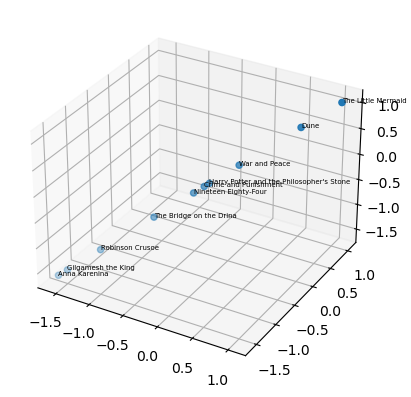

In [170]:
import matplotlib.pyplot as plt
L = 0
R = L + 10

# fig, ax = plt.subplots()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(coord[2][L:R], coord[0][L:R], coord[1][L:R])

for i, lbl in enumerate(l[L:R]):
    ax.text(coord[1][L + i], coord[2][L + i], coord[1][L + i], lbl, color='black', fontsize=5)
    # ax.annotate(lbl, (coord[0][L + i], coord[1][L + i]))